In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

%matplotlib inline
sns.set(style='darkgrid', font_scale=1.5)

In [2]:
con = sqlite3.connect('data_21_09_21.sqlite')
cursor = con.cursor()

In [3]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('android_metadata',), ('data_table',), ('person_table',)]


In [2]:
data_df = pd.read_csv('data_21_09_21_data_table.csv', index_col='data_id')
person_df = pd.read_csv('data_21_09_21_person_table.csv', index_col='_id')

In [3]:
person_df

,height,mass,position,is_valid,age,sex
_id,,,,,,
1,180,85,2,0,18,1
2,185,75,1,0,18,1
3,185,75,2,0,18,1
4,185,75,3,0,18,1
5,185,75,3,0,18,1
6,185,75,3,0,18,1
7,185,75,1,1,18,1
8,185,75,2,1,18,1
9,185,75,3,1,18,1


In [4]:
data_df.head()

,_id,x,y,z
data_id,,,,
1,1,13916,-1172,-8424
2,1,13916,-1172,-8424
3,1,13816,-1156,-8304
4,1,13816,-1156,-8304
5,1,14188,-1256,-8012


In [5]:
def plot_comparasion(data_1, data_2, cut=True):
    '''
    Сравнивает два временных ряда
    
    Параметры:
    1) cut - Если True, то обрезает данные с большим размером до меньшего.
    '''
    
    if cut:
        min_size = np.min((data_1.shape[0], data_2.shape[0]))
        data_1 = data_1[:min_size].copy()
        data_2 = data_2[:min_size].copy()
    
    plt.figure(figsize=(15, 40))

    for i, col in enumerate(data_1.columns):
        plt.subplot(4, 1, i+1)
        plt.scatter(data_1.index, data_1[col], c='blue', alpha=0.5, label='data_1')
        plt.scatter(data_2.index, data_2[col], c='red', alpha=0.25, label='data_2')
        plt.legend()
        plt.xlabel('t')
        plt.ylabel(col)
        plt.title('Сравнение по {}'.format(col))
 
    
    # Сравним по длине векторов
    vec_1 = np.sqrt(data_1['x']**2 + data_1['y']**2 + data_1['z']**2)
    vec_2 = np.sqrt(data_2['x']**2 + data_2['y']**2 + data_2['z']**2)
    
    plt.subplot(4, 1, 4)
    plt.scatter(data_1.index, vec_1, c='blue', alpha=0.25, label='data_1')
    plt.scatter(data_2.index, vec_2, c='green', alpha=0.25, label='data_2')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('r')
    plt.title('Сравенение по r')

    plt.tight_layout()
    plt.show()

In [6]:
mask_1 = person_df[(person_df['position'] == 1) & (person_df['is_valid'] == 0)]
mask_2 = person_df[(person_df['position'] == 1) & (person_df['is_valid'] == 1)]

print(list(mask_1.index))
print(list(mask_2.index))

[2, 10, 18, 19, 25, 31]
[7, 15, 22, 28, 34]


In [7]:
# id_1, id_2 = 14, 17

data_1 = data_df[data_df['_id'].isin(list(mask_1.index))].drop('_id', axis=1).reset_index(drop=True)
data_2 = data_df[data_df['_id'].isin(list(mask_2.index))].drop('_id', axis=1).reset_index(drop=True)

In [8]:
data_1['z'] = np.abs(data_1['z'])
data_2['z'] = np.abs(data_2['z'])

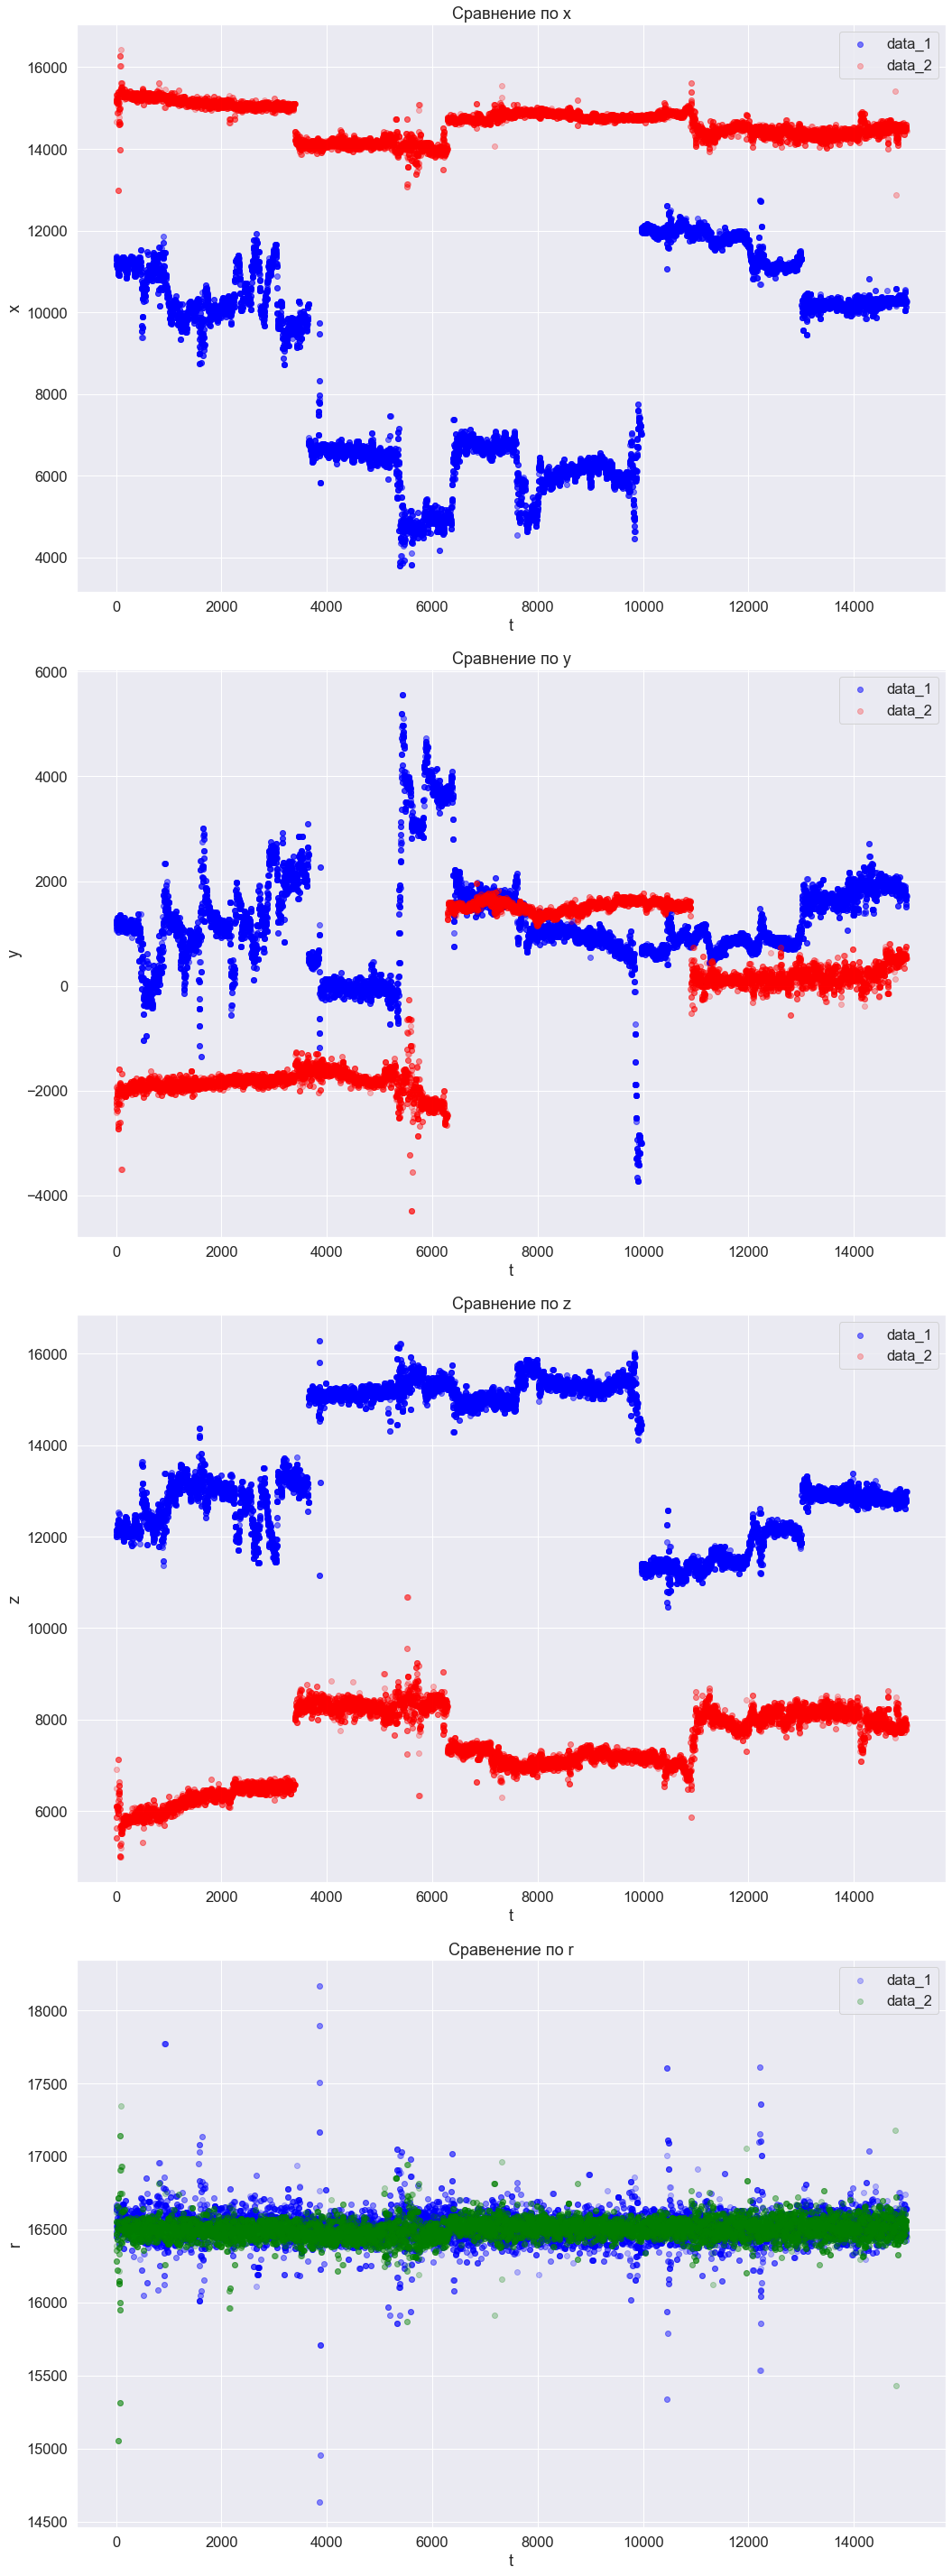

In [9]:
plot_comparasion(data_1[:15000], data_2[:15000])

In [84]:
data_baba = data_df[data_df['_id'] == 25].drop('_id', axis=1).reset_index(drop=True)
data_baba_pms = data_df[data_df['_id'] == 27].drop('_id', axis=1).reset_index(drop=True)

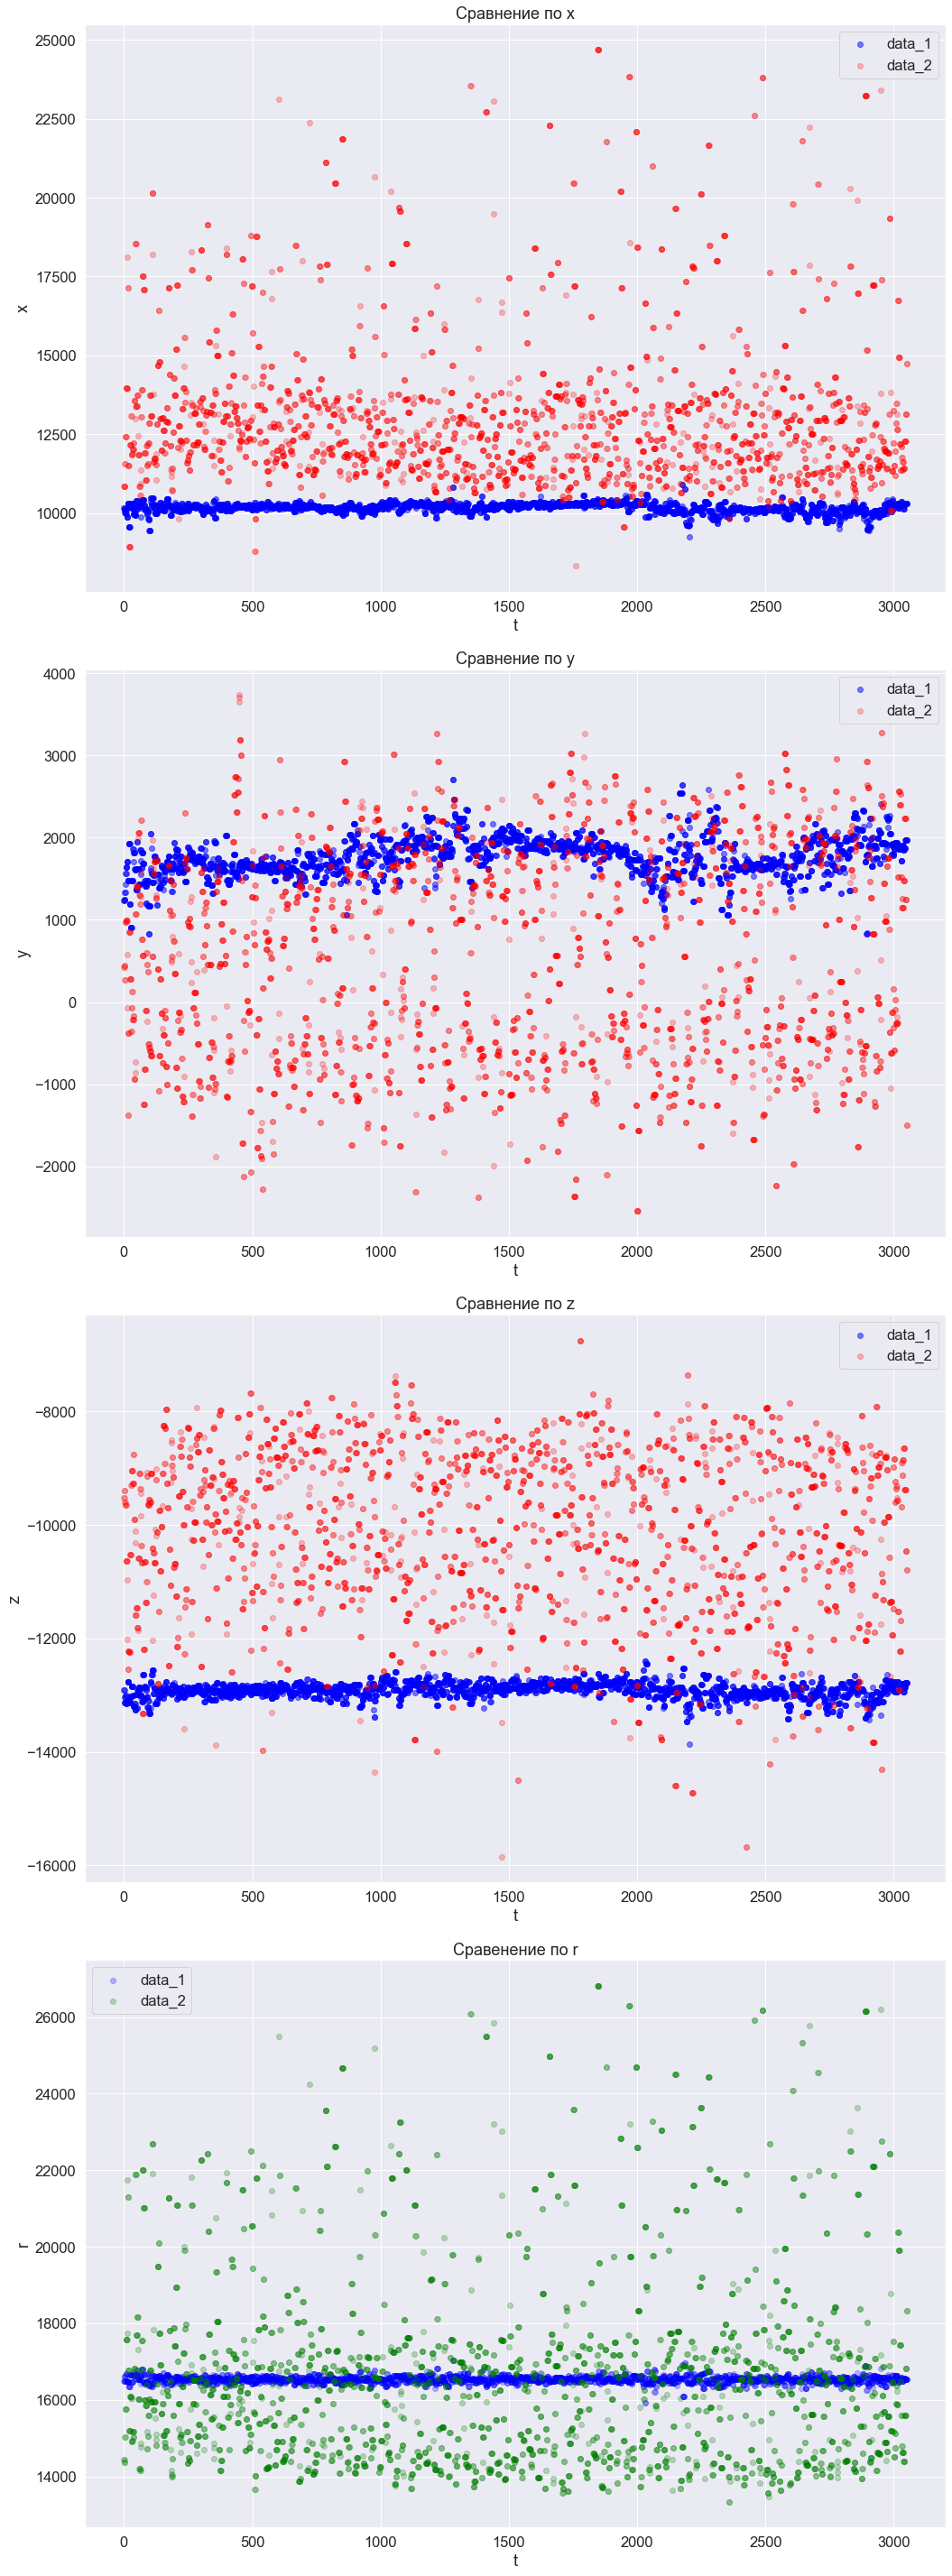

In [85]:
plot_comparasion(data_baba, data_baba_pms)

In [86]:
mask_1 = person_df[(person_df['position'] == 1) & (person_df['is_valid'] == 0)]
mask_2 = person_df[(person_df['position'] == 2) & (person_df['is_valid'] == 0)]

In [87]:
data_1 = data_df[data_df['_id'].isin(list(mask_1.index))].drop('_id', axis=1).reset_index(drop=True)
data_2 = data_df[data_df['_id'].isin(list(mask_2.index))].drop('_id', axis=1).reset_index(drop=True)

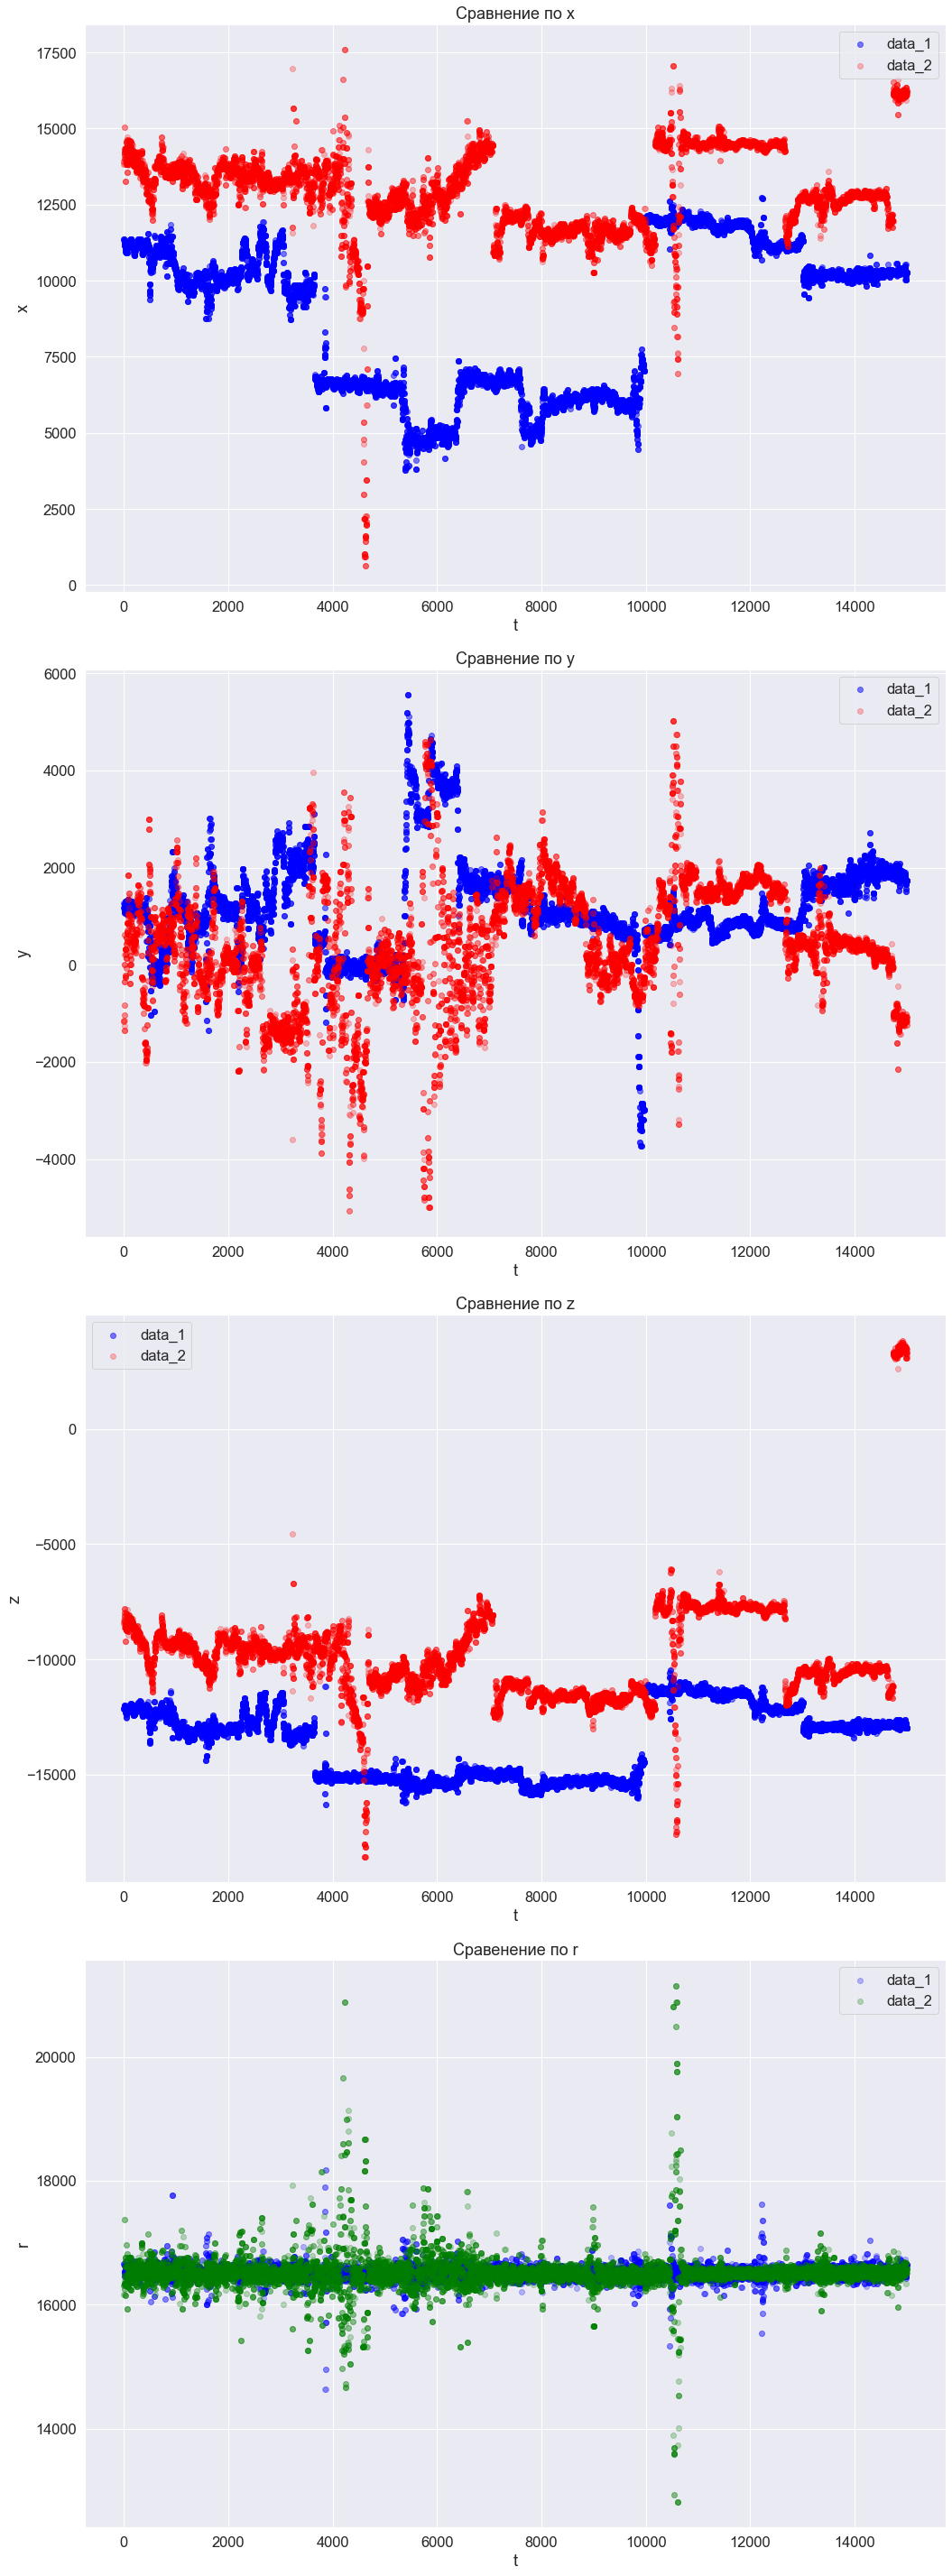

In [88]:
plot_comparasion(data_1[:15000], data_2[:15000])

### Проверка Роминых данных

In [46]:
data_df = pd.read_csv('datasets/data_21_09_21_roma_data_table.csv', index_col='data_id')
person_df = pd.read_csv('datasets/data_21_09_21_roma_person_table.csv', index_col='_id')

In [47]:
person_df

,height,mass,position,is_valid,age,sex
_id,,,,,,
1,176,70,1,0,19,1
2,176,70,1,0,19,1
3,176,70,2,0,19,1
5,176,70,1,1,19,1
6,176,70,1,1,19,1
7,176,70,1,1,19,1
8,176,70,1,1,19,1
9,176,70,2,1,19,1
10,176,70,3,1,19,1


In [48]:
ok_id = []

for _id in person_df.index:
    if data_df[data_df['_id'] == _id].size != 0:
        ok_id.append(_id)

In [49]:
person_df = person_df.loc[ok_id]

In [50]:
# 16 -> 14
data_df.loc[data_df['_id'] == 16, '_id'] = 14
person_df.drop(16, inplace=True)

# 23 -> 21
data_df.loc[data_df['_id'] == 23, '_id'] = 21
person_df.drop(21, inplace=True)

In [51]:
person_df

,height,mass,position,is_valid,age,sex
_id,,,,,,
2,176,70,1,0,19,1
3,176,70,2,0,19,1
8,176,70,1,1,19,1
9,176,70,2,1,19,1
10,176,70,3,1,19,1
11,176,70,3,0,19,1
12,169,52,1,0,19,1
13,169,52,2,0,19,1
14,169,52,3,0,19,1
